In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

# Exploratory Data Analysis
## Data Processing

In [43]:
lg_df = pd.read_csv('oasis_longitudinal.csv')

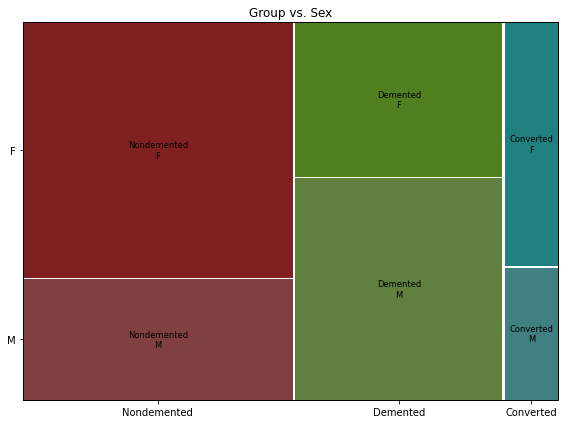

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(lg_df, ['Group', 'M/F'], title='Group vs. Sex', ax=ax)

plt.tight_layout()
plt.savefig('gender_group.png')
plt.show()

In [45]:
lg_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [46]:
lg_df[['Subject ID', 'Group']].drop_duplicates().groupby(['Group']).count()

,Subject ID
Group,
Converted,14
Demented,64
Nondemented,72


Convert all `Converted` labels to `Demented` or `Nondemented` based on `CDR`

In [47]:
lg_df['Demented'] = lg_df['Group']

In [48]:
lg_df.loc[lg_df['CDR'] == 0.5, 'Demented'] = 'Demented'

In [49]:
lg_df.loc[lg_df['CDR'] == 0.0, 'Demented'] = 'Nondemented'

In [50]:
convert = {'Nondemented': 0, 'Demented': 1, 'Converted': 1}

lg_df.Demented = [convert[i] for i in lg_df.Demented]

In [51]:
convert = {'Nondemented': 0, 'Demented': 1, 'Converted': 2}

lg_df['Group_num'] = lg_df['Group']
lg_df.Group_num = [convert[i] for i in lg_df.Group]

In [52]:
lg_df = lg_df.drop(columns=['MRI ID', 'Hand'])

Convert `Subject ID` to a numeric column

In [53]:
lg_df['Subject ID'] = lg_df['Subject ID'].str.lstrip('OAS2_')

In [54]:
lg_df['Subject ID'] = pd.to_numeric(lg_df['Subject ID'])

In [55]:
convert = {'M': 1, 'F': 0}

lg_df = lg_df.rename(columns={'M/F': 'Sex'})
lg_df.Sex = [convert[i] for i in lg_df.Sex]

In [56]:
lg_df = lg_df[~lg_df.isna().any(axis=1)]

In [57]:
lg_df.columns

Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'Sex', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Demented', 'Group_num'],
      dtype='object')

Let's visualize the boxplots for all demented and undemented subjects with respect to various covariates

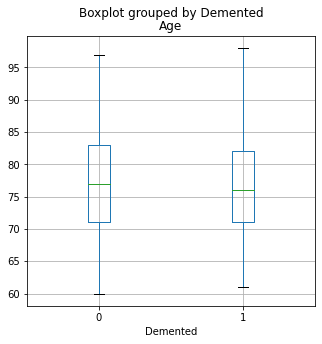

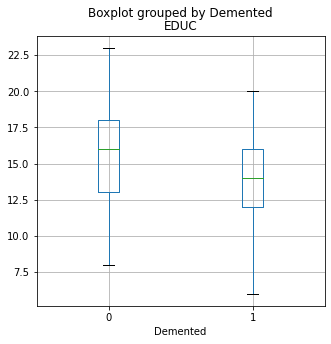

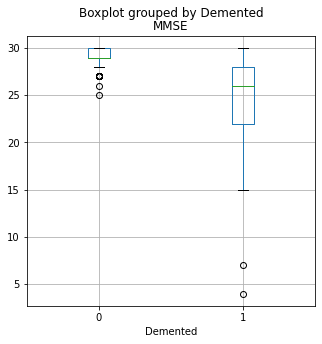

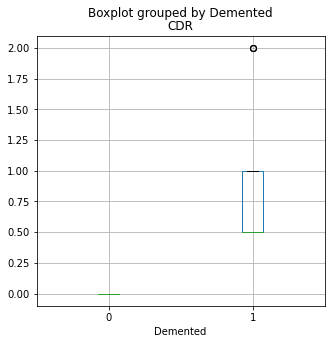

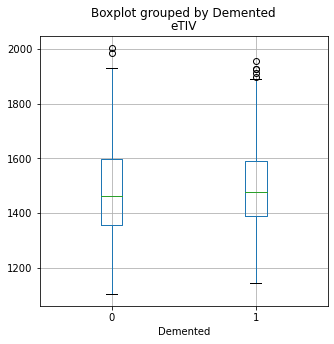

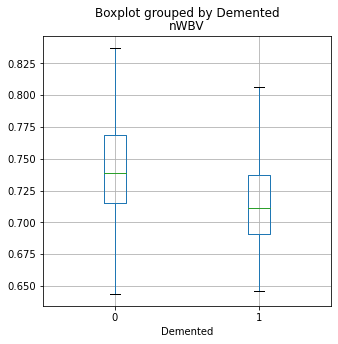

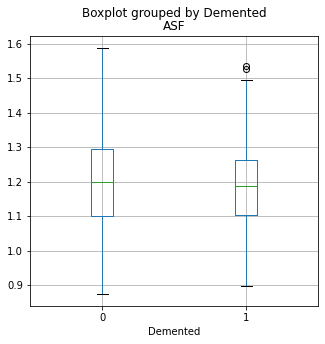

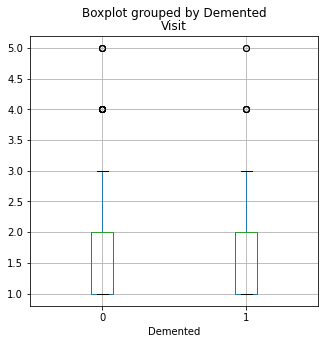

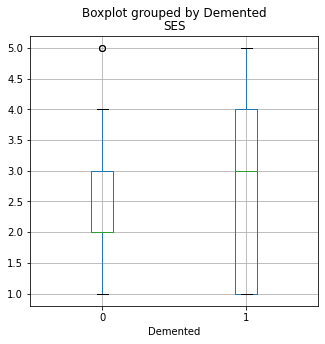

In [58]:
for column in ['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Visit', 'SES']:
    lg_df.boxplot(column=[column], by='Demented', figsize=(5, 5))

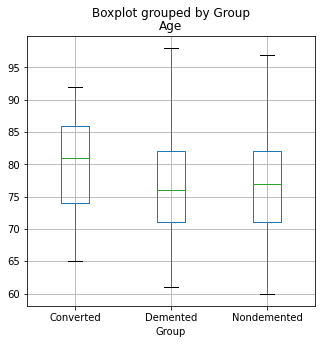

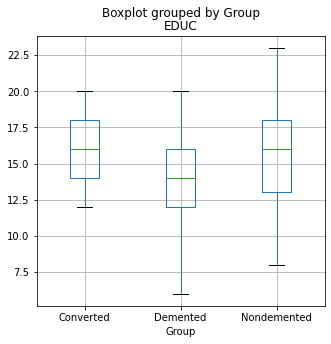

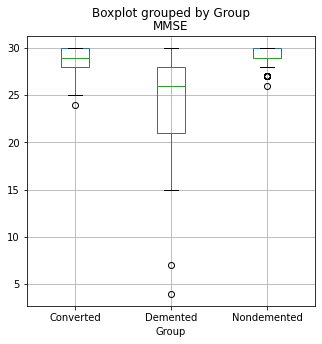

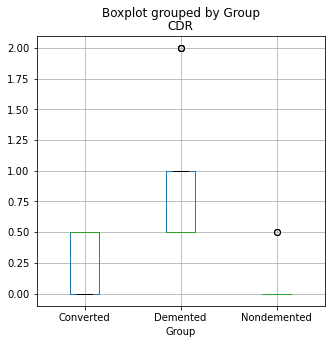

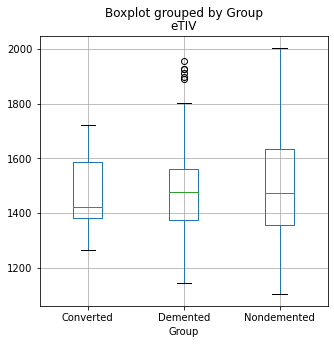

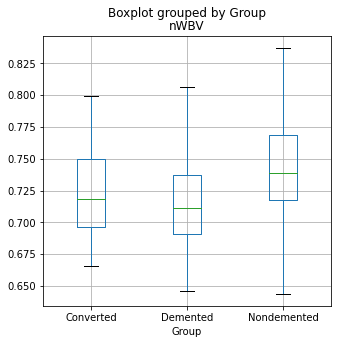

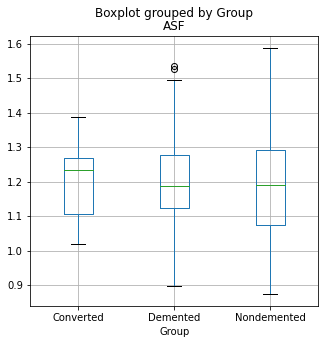

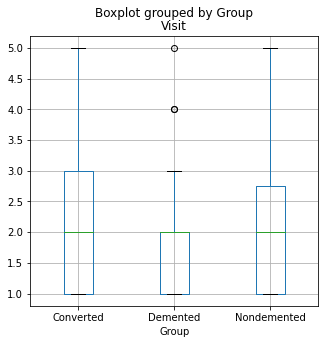

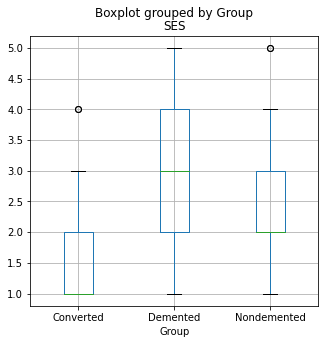

In [59]:
for column in ['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Visit', 'SES']:
    lg_df.boxplot(column=[column], by='Group', figsize=(5, 5))

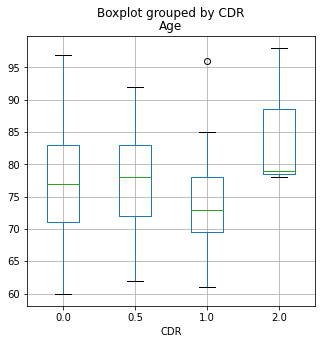

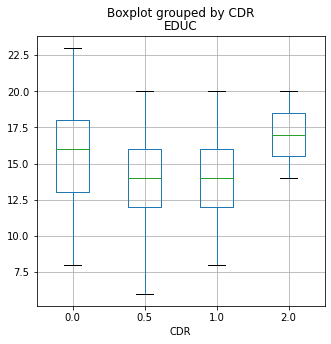

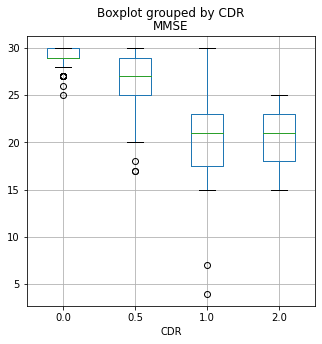

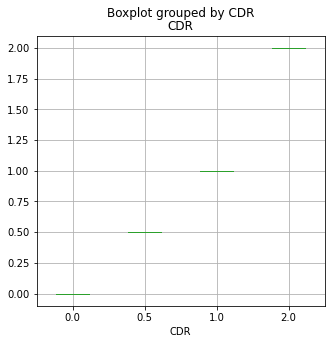

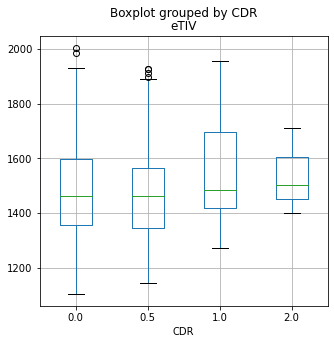

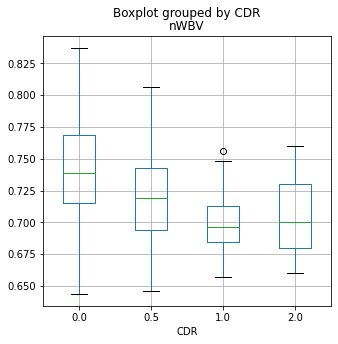

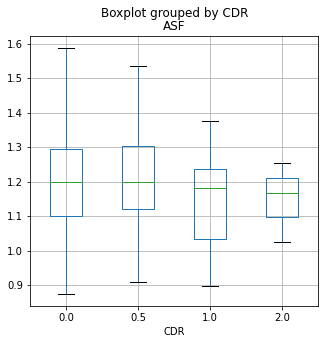

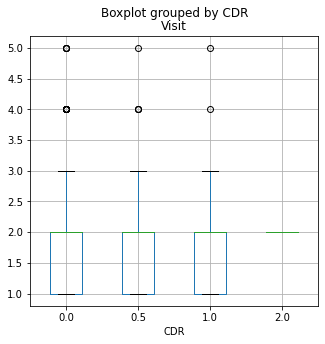

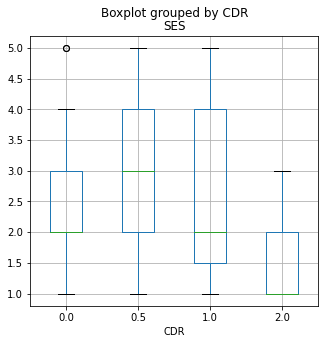

In [60]:
for column in ['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Visit', 'SES']:
    lg_df.boxplot(column=[column], by='CDR', figsize=(5, 5))

Now let's look at the correlation matrix of the covariates

In [61]:
corr = lg_df.drop(columns=['Group_num']).corr()

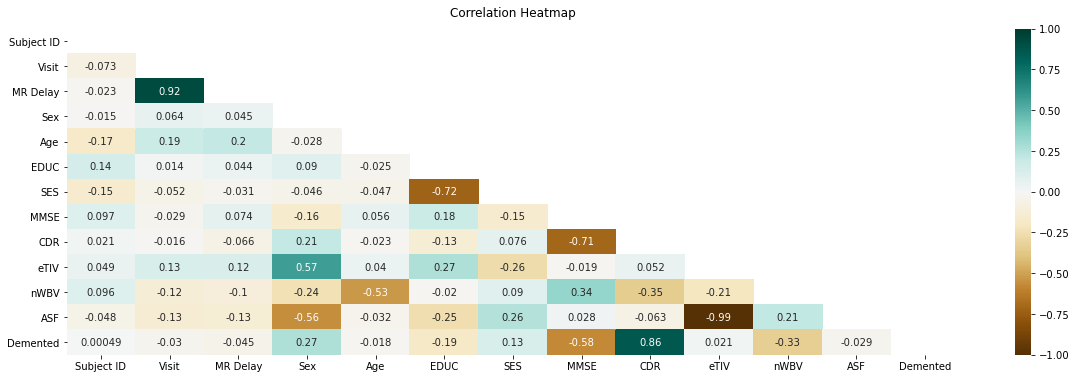

In [62]:
plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Let's arbitrarily remove `ASF` since it is highly correlated with `eTIV`

In [63]:
lg_df = lg_df.drop(columns=['ASF'])

CDR contains decimals, so let's convert it to integers

In [64]:
convert = {0: 0, 0.5: 1, 1: 2, 2: 3}

lg_df['CDR_int'] = 0
lg_df.CDR_int = [convert[i] for i in lg_df.CDR]

In [65]:
lg_df.to_csv('dementia.tsv', sep='\t', index=False)

In [87]:
lg_df

,Subject ID,Group,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,Demented,Group_num,CDR_int
0,1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0,0,0
1,1,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0,0,0
5,4,Nondemented,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,0,0,0
6,4,Nondemented,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,0,0,0
7,5,Nondemented,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,185,Demented,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1,1,1
369,185,Demented,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1,1,1
370,186,Nondemented,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,0,0,0
371,186,Nondemented,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,0,0,0


In [80]:
test = lg_df.melt(id_vars='Demented', 
                  value_vars=['MMSE', 'EDUC', 'nWBV', 'SES'],
                  var_name='columns')

C:\Users\matth\anaconda3\envs\stats\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\matth\anaconda3\envs\stats\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


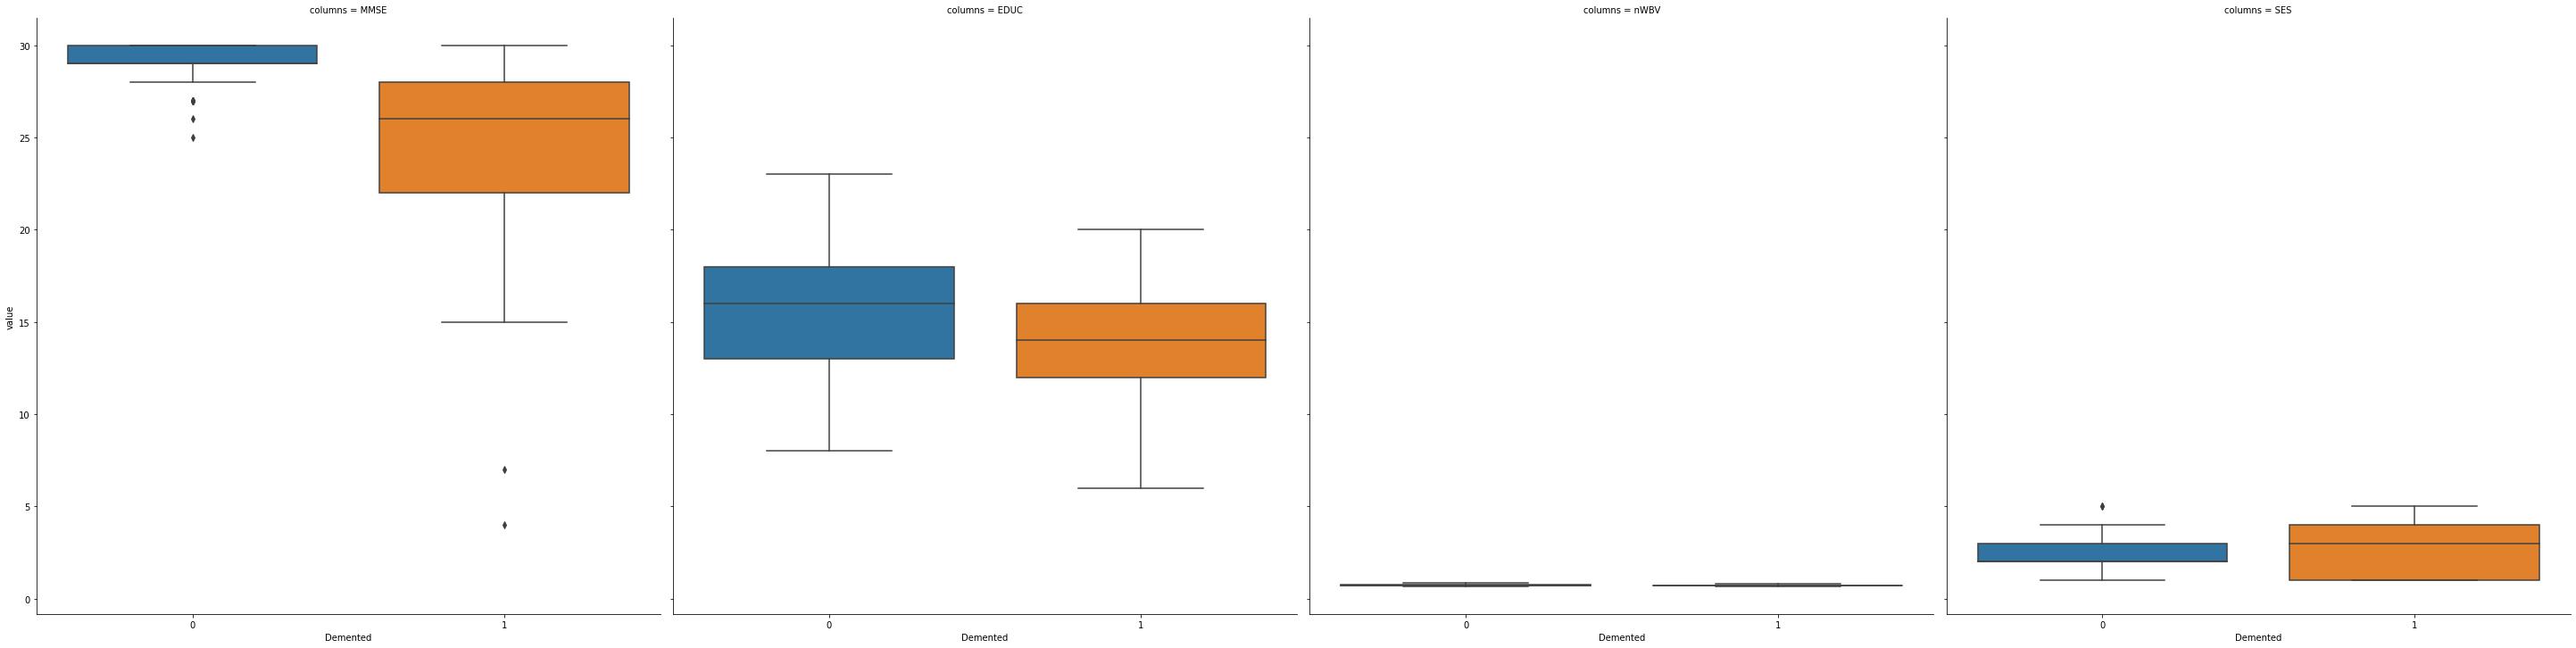

In [81]:
sns.factorplot(data=test,
               x='Demented',
               y='value',
               kind='box',
               col='columns',
               size=10)

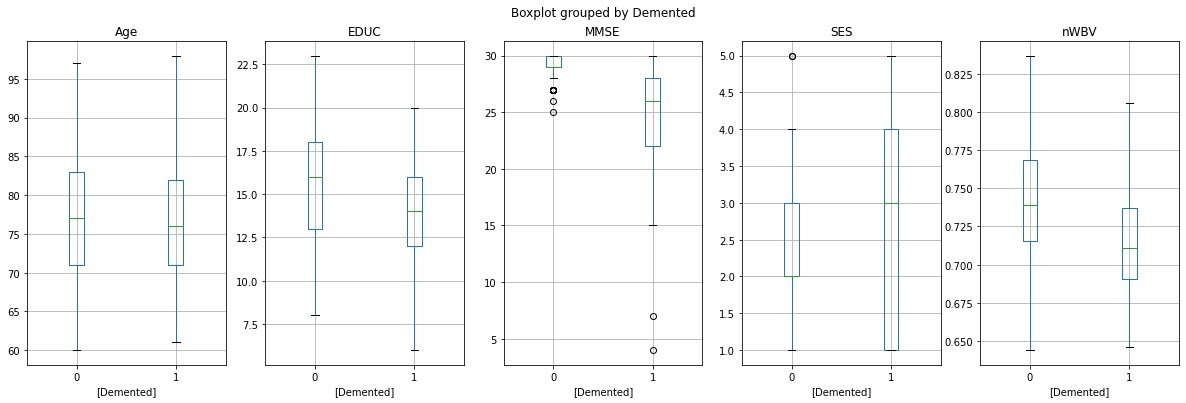

In [104]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 6))

lg_df[['MMSE', 'EDUC', 'nWBV', 'SES', 'Demented', 'Age']].boxplot(by='Demented', return_type='axes', ax=axes)
plt.show()

fig.tight_layout()
fig.savefig('demented_boxplot.png')

C:\Users\matth\anaconda3\envs\stats\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


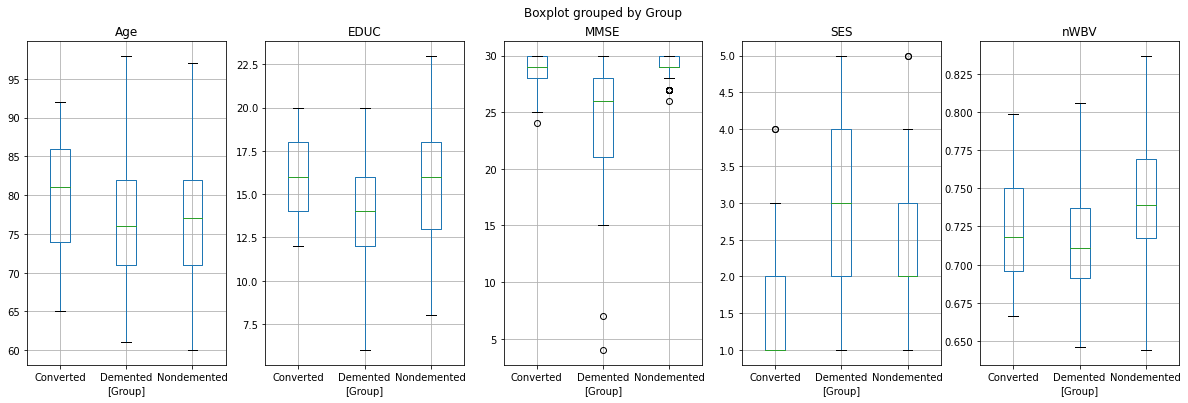

In [101]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 6))

lg_df[['MMSE', 'EDUC', 'nWBV', 'SES', 'Group', 'Age']].boxplot(by='Group', return_type='axes', ax=axes)
plt.show()

fig.tight_layout()
fig.savefig('group_boxplot.png')

C:\Users\matth\anaconda3\envs\stats\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


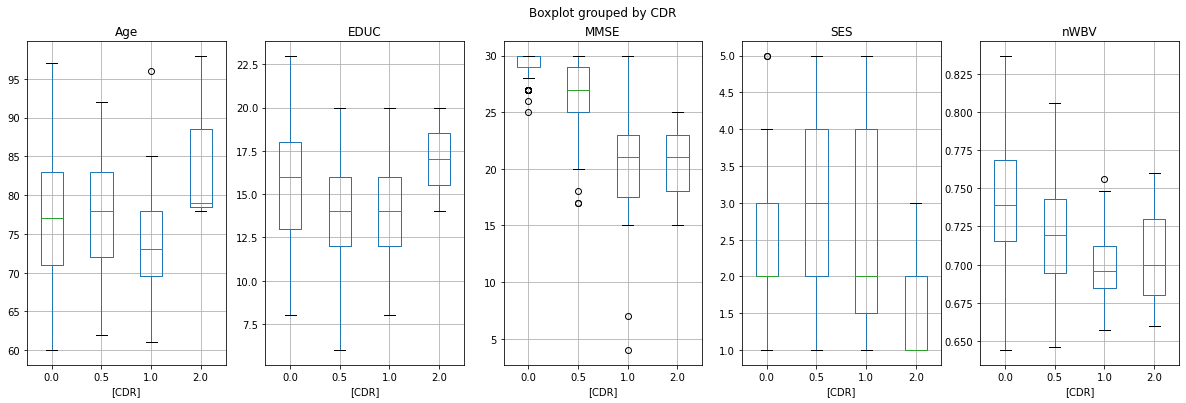

In [100]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 6))

lg_df[['MMSE', 'EDUC', 'nWBV', 'SES', 'CDR', 'Age']].boxplot(by='CDR', return_type='axes', ax=axes)
plt.show()

fig.tight_layout()
fig.savefig('cdr_boxplot.png')